## Neural Network That Can Read Handwriting

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

C:\Users\prart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

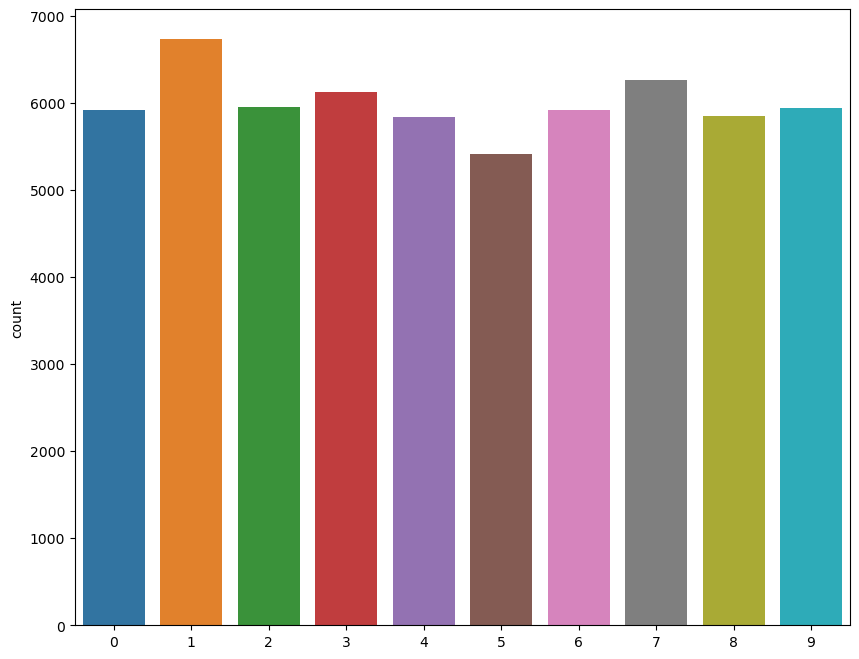

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

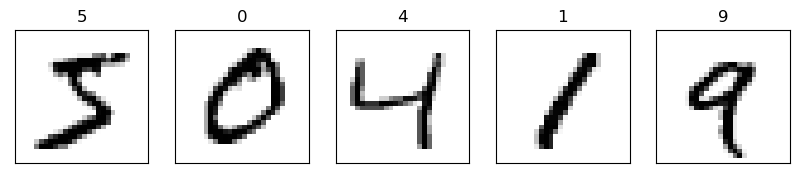

In [11]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [12]:
#This means that there are 60,000 images as input data with shape 28 x 28 each.
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [14]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

# Creating the model
Model Architecture We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

Conv2D - for the convolution layers

Dropout - to prevent overfitting

Dense - a fully connected layer

Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

### CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [16]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Training the model

In [19]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 708s 418ms/step - loss: 0.2558 - accuracy: 0.9254 - val_loss: 0.0799 - val_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 658s 390ms/step - loss: 0.1067 - accuracy: 0.9694 - val_loss: 0.0831 - val_accuracy: 0.9842
Epoch 3/10
1688/1688 [==============================] - 663s 393ms/step - loss: 0.0860 - accuracy: 0.9756 - val_loss: 0.0690 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 688s 408ms/step - loss: 0.0704 - accuracy: 0.9796 - val_loss: 0.1123 - val_accuracy: 0.9837
Epoch 5/10
1688/1688 [==============================] - 1588s 941ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.1005 - val_accuracy: 0.9850
Epoch 6/10
1688/1688 [==============================] - 874s 518ms/step - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.1191 - val_accuracy: 0.9828
Epoch 7/10
1688/1688 [==============================] - 3266s 2s/step - loss: 0.0514 - accuracy: 0.9852 - val_l

# Saving and loading the model

In [20]:
model.save('MNproject.h5')

In [21]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### Evaluating the model

In [22]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 19s 60ms/step - loss: 2.7486 - accuracy: 0.9879
Test Loss 2.7486424446105957
Test Accuracy 0.9879000186920166


### Plotting Training & Validation plots

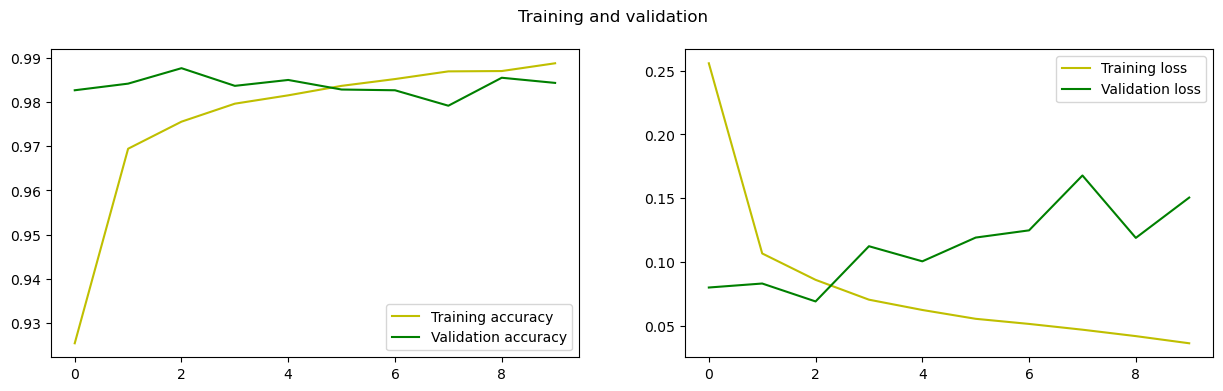

In [26]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [24]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 17s 55ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    5,    0,    0,    0,    1,    0,    2,    0],
       [   0, 1121,    1,    1,    1,    2,    4,    0,    5,    0],
       [   0,    2, 1025,    0,    1,    0,    1,    3,    0,    0],
       [   0,    0,    6,  998,    0,    3,    0,    1,    2,    0],
       [   0,    0,    0,    0,  976,    0,    1,    0,    3,    2],
       [   1,    0,    0,    3,    0,  881,    3,    1,    2,    1],
       [   1,    0,    1,    0,    1,    3,  948,    0,    4,    0],
       [   0,    2,   10,    2,    1,    0,    0, 1011,    1,    1],
       [   0,    0,    0,    1,    0,    0,    0,    1,  972,    0],
       [   2,    0,    3,    1,   14,    1,    0,    2,   11,  975]])>

Text(95.72222222222221, 0.5, 'Truth')

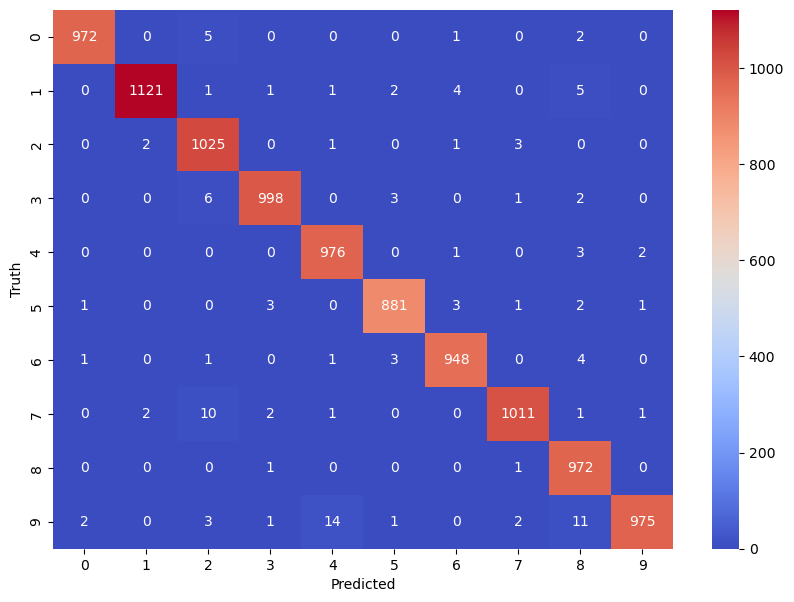

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

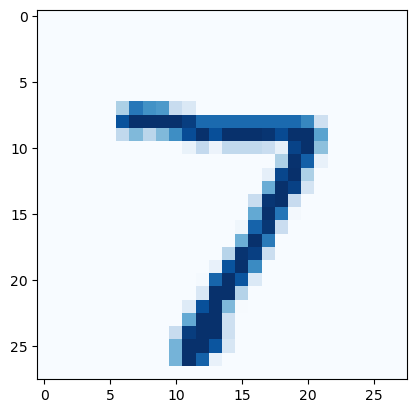

In [28]:
plt.imshow(np.squeeze(x_test[0]),cmap="Blues")

In [29]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

313/313 [==============================] - 18s 56ms/step
7


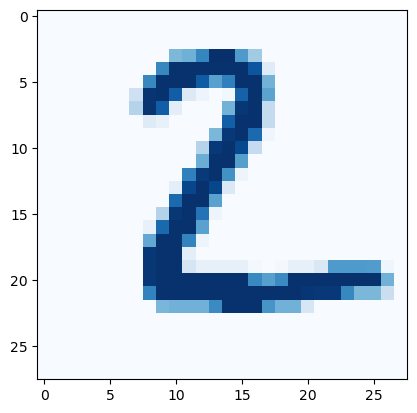

In [30]:
plt.imshow(np.squeeze(x_test[1]),cmap="Blues")

In [31]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

313/313 [==============================] - 20s 63ms/step
2


### Accuracy= 98.7%